# Multiple Linear Regression

## **Problem**
Given the *training dataset* $(\mathbf{x}_i,y_i), i= 1,2,..., N$, this time with $y_i\in \mathbb{R}$ and $x_i\in\mathbb{R}^{p}$, we fit the multi-variable linear function

$$y_i\approx\mathbf{f}(x)=\beta_{0}+\beta_{1}x_{i1}+..+\beta_{p}x_{ip} = \mathbf{x}_i^T\beta,$$  

$$\mathbf{x}_i=(1,x_{i1},..,x_{ip})\in\mathbb{R}^{p+1},\beta = (\beta_{0},\beta_{1},..,\beta_{p})\in\mathbb{R}^{p+1}.$$

Here $\beta$'s are regression coefficients, and $\beta_{0}$ is the intercept. 

The data can be written as

$$Y=
 \begin{bmatrix}
   y^{(1)}\\
   y^{(2)} \\
   \cdots \\
   y^{(N)}
  \end{bmatrix} 
$$

Our prediction in matrix form is

$$
  \begin{bmatrix}
   \mathbf{f}(\mathbf{x}_1)\\
   \mathbf{f}(\mathbf{x}_2)\\
   \cdots \\
   \mathbf{f}(\mathbf{x}_N)
  \end{bmatrix} 
  =
  \begin{bmatrix}
   1& x_{11}& \cdots & x_{1p}\\
   1& x_{21}& \cdots & x_{2p}\\
   \cdots \\
   1& x_{N1}& \cdots & x_{Np}  
   \end{bmatrix} 
    \begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \cdots \\
    \beta_{p}
  \end{bmatrix}
= \mathbf{X}\beta,
$$

Here $\mathbf{X}$ is a $N\times (p+1)$ matrix, and is called the data matrix or design matrix.


### Training the model

With the training dataset, define the loss function $L(\beta)$ of parameters $\beta$, which is the **Residual Sum of Squares** (RSS). We could also divide it by $N$ to get the **Mean Squared Error** (MSE). This does not change the optimal solution

$$L(\beta)= \sum_{i=1}^N(y_i-\mathbf{x}_i^T\beta)^{2},$$

In matrix form, it can be written as 


$$ L(\beta) = ||Y-\mathbf{X} \beta||^{2} $$

We arrive at the optimization problem:

$$\min_{\beta} L(\beta).$$

To solve the critical points, we have $\nabla L(\beta)=0$.

In Matrix form, it can be expressed as (left as exercise) 

$$\mathbf{X}^{T}\mathbf{X}\beta=\mathbf{X}^{T}Y,$$

also called the **normal equation** of linear regression. 

The optimal parameter is given by
$\hat{\beta}= (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}Y$.

The prediction of the model is $\hat{Y}=\mathbf{X}\hat{\beta}$.


<!-- **[Geometrical Interpretation](https://en.wikipedia.org/wiki/Ordinary_least_squares)**

From the normal equation,

$$\mathbf{X}^{T}(\mathbf{Y}-\mathbf{X} \hat{\beta})=0$$

We are requiring that the residual $Y-\mathbf{X} \hat{\beta}$ is orthogonal to the column space of $\mathbf{X}$. -->

**Exercise**: Check that when $p=1$, the solution is equivalent to the single-variable regression. 

### Evaluating the model

- MSE: The smaller MSE indicates better performance
- R-Squared: The larger $R^{2}$ (closer to 1) indicates better performance. Compared with MSE, R-squared is **dimensionless**, not dependent on the units of variable. 

$$R^{2} = 1 - \frac{\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{\text{MSE}}{\text{Var}(Y)}$$

In [1]:
import numpy as np
from sklearn import linear_model


N = 100
X = np.random.rand(N,2)
y = 2*X[:,0] + 3*X[:,1] + 0.2*np.random.randn(N)


lreg_sklearn = linear_model.LinearRegression()
lreg_sklearn.fit(X,y) 

print(lreg_sklearn.coef_, lreg_sklearn.intercept_)

[2.00119863 3.09056991] -0.05932484656856518


In [2]:
# solve the linear regression problem using the normal equation
ones = np.ones((N,1))
X = np.hstack((ones,X))
beta = np.linalg.inv(X.T@X)@X.T@y
print(beta)
# the result is the same as the one from sklearn
# 

[-0.05932485  2.00119863  3.09056991]


In [3]:
# least-squares solution to a linear matrix equation.
beta = np.linalg.lstsq(X,y)[0]
print(beta)

[-0.05932485  2.00119863  3.09056991]


/Users/Ray/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


<IPython.core.display.Javascript object>


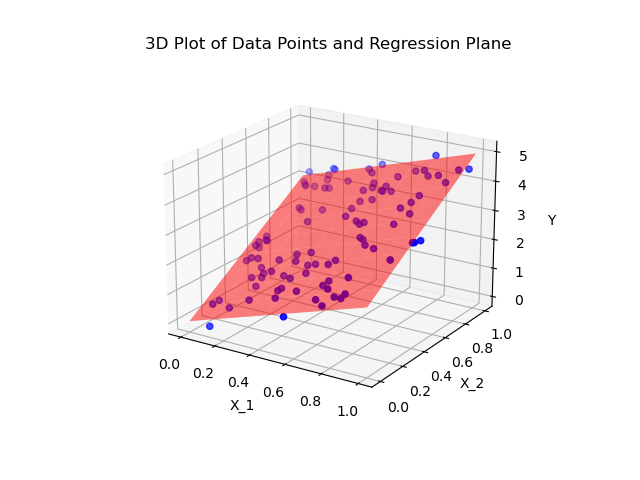

In [10]:
# visualize the data

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

N = 100
X = np.random.rand(N,2)
y = 2*X[:,0] + 3*X[:,1] + 0.2*np.random.randn(N)

lreg_sklearn = linear_model.LinearRegression()
lreg_sklearn.fit(X,y)

# Coefficients
coefficients = lreg_sklearn.coef_
intercept = lreg_sklearn.intercept_

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the data points
ax.scatter(X[:, 0], X[:, 1], y, color='b', label='Data Points')

# Create a meshgrid to plot the surface (regression plane)
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = coefficients[0] * xx + coefficients[1] * yy + intercept

# Plotting the surface
ax.plot_surface(xx, yy, zz, alpha=0.5, color='r', label='Regression Plane')

# Labels and title
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
ax.set_title('3D Plot of Data Points and Regression Plane')

plt.show()



In [5]:
import seaborn as sns

df = sns.load_dataset('penguins')


# need to remove missing values
df.dropna(inplace=True,thresh=6)

# predict body mass from flipper length and bill length
lreg_sklearn = linear_model.LinearRegression()

X = df[['bill_depth_mm']]
y = df['body_mass_g']

lreg_sklearn.fit(X,y)
lreg_sklearn.score(X,y)

# use more features
X = df[['flipper_length_mm','bill_length_mm','bill_depth_mm']]
lreg_sklearn.fit(X,y)
lreg_sklearn.score(X,y)

0.7614704841272493

# Colinearity 

If two variables are highly correlated, intuitively, we can say that they are measuring the same thing. In the context of linear regression, this is called multicollinearity.

Suppose $Y = aX_1$ and $X_2 = bX_1$, then we can write $Y = \beta_1 X_1 + \beta_2 X_2$ for any $\beta_1$  and $\beta_2$ such that $\beta_1 + b \beta_2 = a$.

We can see that the coefficients are not unique. 

**Does this affect prediction?**

In [6]:
X = np.random.uniform(0,1,(100,1))

# append collinear columns
X = np.column_stack((X, X[:,0]*2))
y = X[:,0] + np.random.randn(100)

# regression with X0 and X1=2*X0
lreg_sklearn = linear_model.LinearRegression()
lreg_sklearn.fit(X,y)
score = lreg_sklearn.score(X,y)
print(lreg_sklearn.coef_, lreg_sklearn.intercept_,score)


# regression with X0
lreg_sklearn.fit(X[:,0:1],y)
score = lreg_sklearn.score(X[:,0:1],y)
print(lreg_sklearn.coef_, lreg_sklearn.intercept_,score)


[0.26982233 0.53964467] -0.30075925715168966 0.1350773830425076
[1.34911167] -0.3007592571516899 0.1350773830425076


## Interpretation of the coefficients

**Does the size of the coefficient mean "importance"?**

Generally, the size of the coefficient is not a good indicator of the importance of the feature. The size of the coefficient is affected by the scale of the feature. If we change the unit of the feature, the coefficient will change accordingly. For example, if we change the unit of the feature from meters to centimeters, the coefficient will be 100 times larger. However, the importance of the feature does not change.

But we can ask the following question: 

**If we remove/increase a feature from the model, how much does the model performance decrease/increase?**

If the model performance decreases significantly, then the feature is important in making predictions.

However, this depends on the group of features in the model. Suppose $Y = X_1 + X_2$. $X_3$ is higly correlated with $X_1$. Then both (X_1, X_3) and (X_2, X_3) are good models. Using all three features does not increase the performance.

